# Task 1

## Required 

Implement and apply the following filters on carkyo image:
- Scharr.
- Prewitt.
- Roberts.

## Criteria

- Filter must be in both X-Dir and Y-Dir.
- For each filter, 3 outputs are required (x, y, mag).
- All filters must be implemented using cv2.Filter2D.

## Grade
10

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

    # Scharr High Pass Filter Implementation
def Scharr_with_Scharr_fun(image):
    scharrx_filter = cv2.Scharr(image, ddepth=-1, dx=1, dy=0, scale=1, borderType=cv2.BORDER_DEFAULT)

    scharry_filter = cv2.Scharr(image, ddepth=-1, dx=0, dy=1, scale=1, borderType=cv2.BORDER_DEFAULT)

    scharr_filter = np.power((np.power(scharrx_filter,2) + np.power(scharry_filter,2)),1/2)

    return scharrx_filter,scharry_filter,scharr_filter


def Scharr_with_filter2D(image):
    kernelx = np.array([ [-3,-10,-3]
                        ,[0,0,0]
                        ,[3,10,3]])
    kernely = np.array([ [-3,0,3]
                        ,[-10,0,10]
                        ,[-3,0,3]])

    scharrx_filter = cv2.filter2D(image, -1, kernelx)
    scharry_filter = cv2.filter2D(image, -1, kernely)
    scharr_filter = np.power((np.power(scharrx_filter,2) + np.power(scharry_filter,2)),1/2)

    return scharrx_filter,scharry_filter,scharr_filter

def Prewitt(image):
    kernelx = np.array([ [1,1,1]
                        ,[0,0,0]
                        ,[-1,-1,-1]])
    kernely = np.array([ [-1,0,1]
                        ,[-1,0,1]
                        ,[-1,0,1]])

    img_prewittx = cv2.filter2D(image, -1, kernelx)
    img_prewitty = cv2.filter2D(image, -1, kernely)
    mag_prewitty_filter = np.power((np.power(img_prewittx,2) + np.power(img_prewitty,2)),1/2)

    return img_prewittx,img_prewitty,mag_prewitty_filter

def Roberts(image):
    kernelx = np.array([[-1, 0], [0, 1]], dtype=int)
    kernely = np.array([[0, -1], [1, 0]], dtype=int)

    img_Robertsx = cv2.filter2D(image, cv2.CV_16S, kernelx)
    img_Robertsy = cv2.filter2D(image, cv2.CV_16S, kernely)
    
    mag_Roberts_filter = np.power((np.power(img_Robertsx,2) + np.power(img_Robertsy,2)),1/2)

    return img_Robertsx,img_Robertsy,mag_Roberts_filter


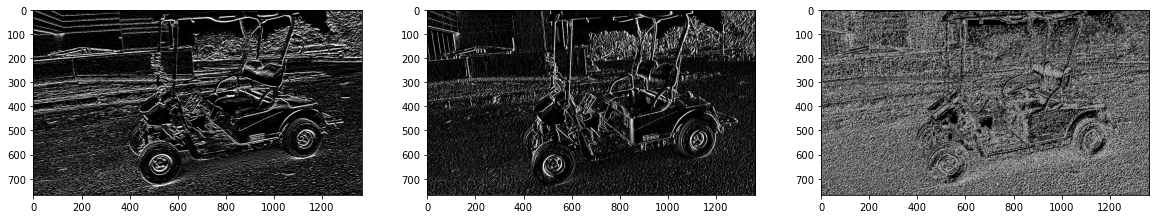

In [29]:
# Scharr Filter with filter2D
img = cv2.imread('Files/001.jpg',0)
x,y,m = Scharr_with_filter2D(img)
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(x,cmap = 'gray')
plt.subplot(1, 3, 2)
plt.imshow(y,cmap = 'gray')
plt.subplot(1, 3, 3)
plt.imshow(m,cmap = 'gray')

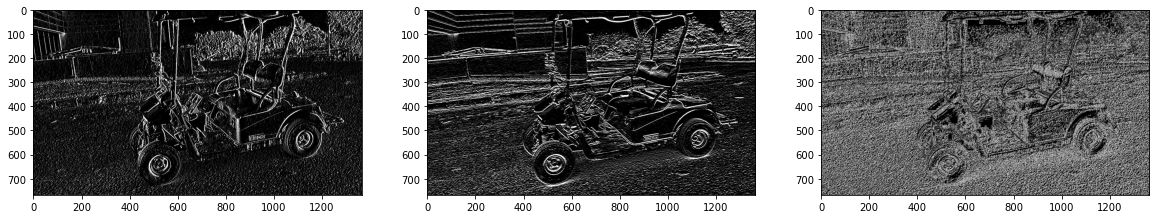

In [30]:
# Scharr Filter with filter2D
img = cv2.imread('Files/001.jpg',0)
x,y,m = Scharr_with_Scharr_fun(img)
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(x,cmap = 'gray')
plt.subplot(1, 3, 2)
plt.imshow(y,cmap = 'gray')
plt.subplot(1, 3, 3)
plt.imshow(m,cmap = 'gray')

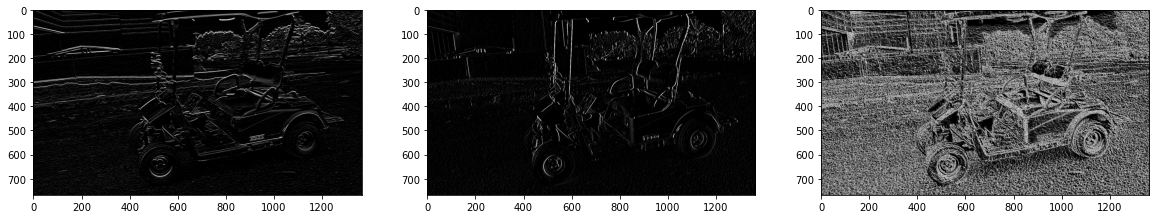

In [31]:
img = cv2.imread('Files/001.jpg',0)
x,y,m = Prewitt(img)
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(x,cmap = 'gray')
plt.subplot(1, 3, 2)
plt.imshow(y,cmap = 'gray')
plt.subplot(1, 3, 3)
plt.imshow(m,cmap = 'gray')

<ipython-input-28-532848b74711>:51: RuntimeWarning: invalid value encountered in power
  mag_Roberts_filter = np.power((np.power(img_Robertsx,2) + np.power(img_Robertsy,2)),1/2)


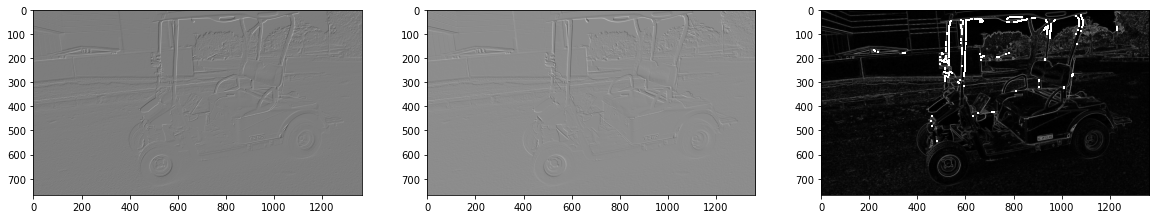

In [32]:
img = cv2.imread('Files/001.jpg',0)
x,y,m = Roberts(img)
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(x,cmap = 'gray')
plt.subplot(1, 3, 2)
plt.imshow(y,cmap = 'gray')
plt.subplot(1, 3, 3)
plt.imshow(m,cmap = 'gray')